In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import zipcodes as zc
from collections import Counter
from pprint import pprint

In [2]:
#From https://stackoverflow.com/questions/1518522/find-the-most-common-element-in-a-list

from collections import Counter
# Find the most common element of a list
def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

# ETL for WastewaterSCAN data 

## Initial data exploration

In [3]:
df = pd.read_csv("download_WWSCAN_selected_plants_all_targets_20240224.csv")

In [4]:
print("Dataframe df has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Dataframe df has 42813 rows and 59 columns.


In [5]:
df.columns

Index(['sample_id', 'collection_date', 'bcov_recovery', 'bcov_recovery_lci',
       'bcov_recovery_uci', 'city', 'state', 'name', 'site_name',
       'sewershed_pop', 'state_abbr', 'HMPV_4_gc_g_dry_weight',
       'HMPV_4_gc_g_dry_weight_lci', 'HMPV_4_gc_g_dry_weight_uci',
       'Influenza_A_gc_g_dry_weight', 'Influenza_A_gc_g_dry_weight_lci',
       'Influenza_A_gc_g_dry_weight_uci', 'Influenza_B_gc_g_dry_weight',
       'Influenza_B_gc_g_dry_weight_lci', 'Influenza_B_gc_g_dry_weight_uci',
       'MPXV_G2R_WA_gc_g_dry_weight', 'MPXV_G2R_WA_gc_g_dry_weight_lci',
       'MPXV_G2R_WA_gc_g_dry_weight_uci', 'Noro_G2_gc_g_dry_weight',
       'Noro_G2_gc_g_dry_weight_lci', 'Noro_G2_gc_g_dry_weight_uci',
       'RSV_gc_g_dry_weight', 'RSV_gc_g_dry_weight_lci',
       'RSV_gc_g_dry_weight_uci', 'N_Gene_gc_g_dry_weight',
       'N_Gene_gc_g_dry_weight_lci', 'N_Gene_gc_g_dry_weight_uci',
       'S_Gene_gc_g_dry_weight', 'S_Gene_gc_g_dry_weight_lci',
       'S_Gene_gc_g_dry_weight_uci', 'PMMoV_g

In [6]:
print(f"There are {df['sample_id'].nunique()} values of sample_id in dataframe df, so sample_id is a primary key.")

There are 42813 values of sample_id in dataframe df, so sample_id is a primary key.


## Consider null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42813 entries, 0 to 42812
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sample_id                        42813 non-null  object 
 1   collection_date                  42813 non-null  object 
 2   bcov_recovery                    42811 non-null  float64
 3   bcov_recovery_lci                42811 non-null  float64
 4   bcov_recovery_uci                42811 non-null  float64
 5   city                             42813 non-null  object 
 6   state                            42813 non-null  object 
 7   name                             42813 non-null  object 
 8   site_name                        42813 non-null  object 
 9   sewershed_pop                    42813 non-null  int64  
 10  state_abbr                       42813 non-null  object 
 11  HMPV_4_gc_g_dry_weight           32819 non-null  float64
 12  HMPV_4_gc_g_dry_we

**There are a lot of null values.** 
**Study the distribution of data in dataframe df using missingno library.**

See [useful video](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)

<Axes: >

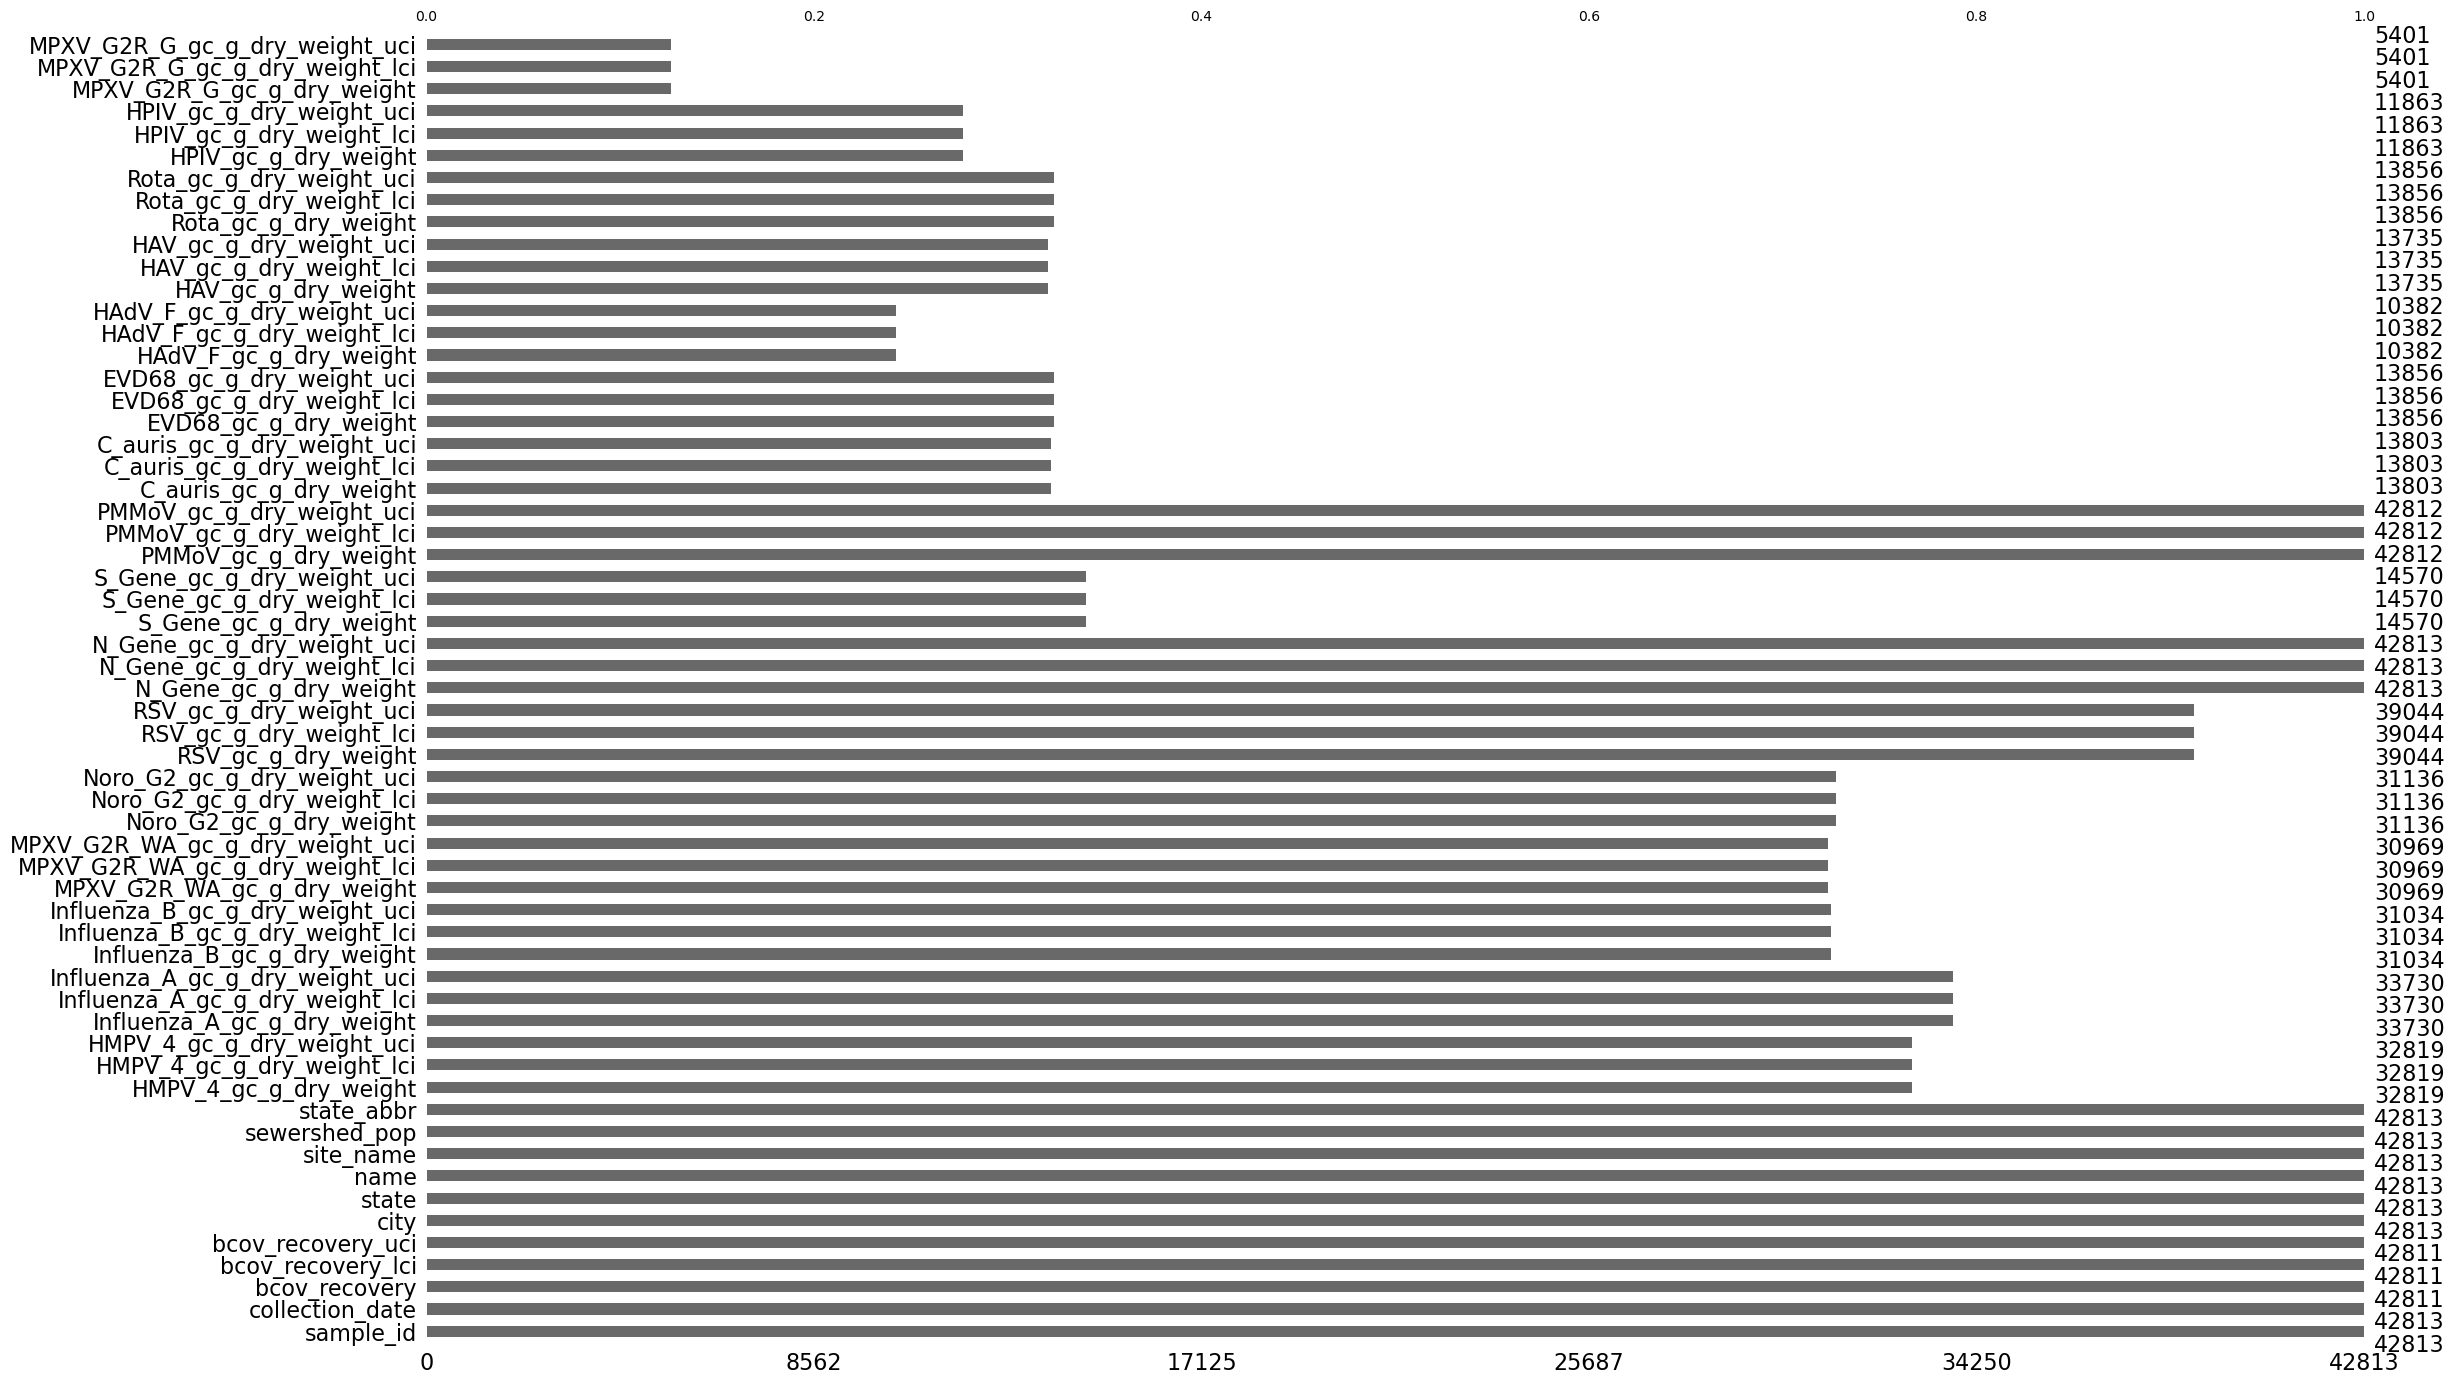

In [8]:
msno.bar(df)

<Axes: >

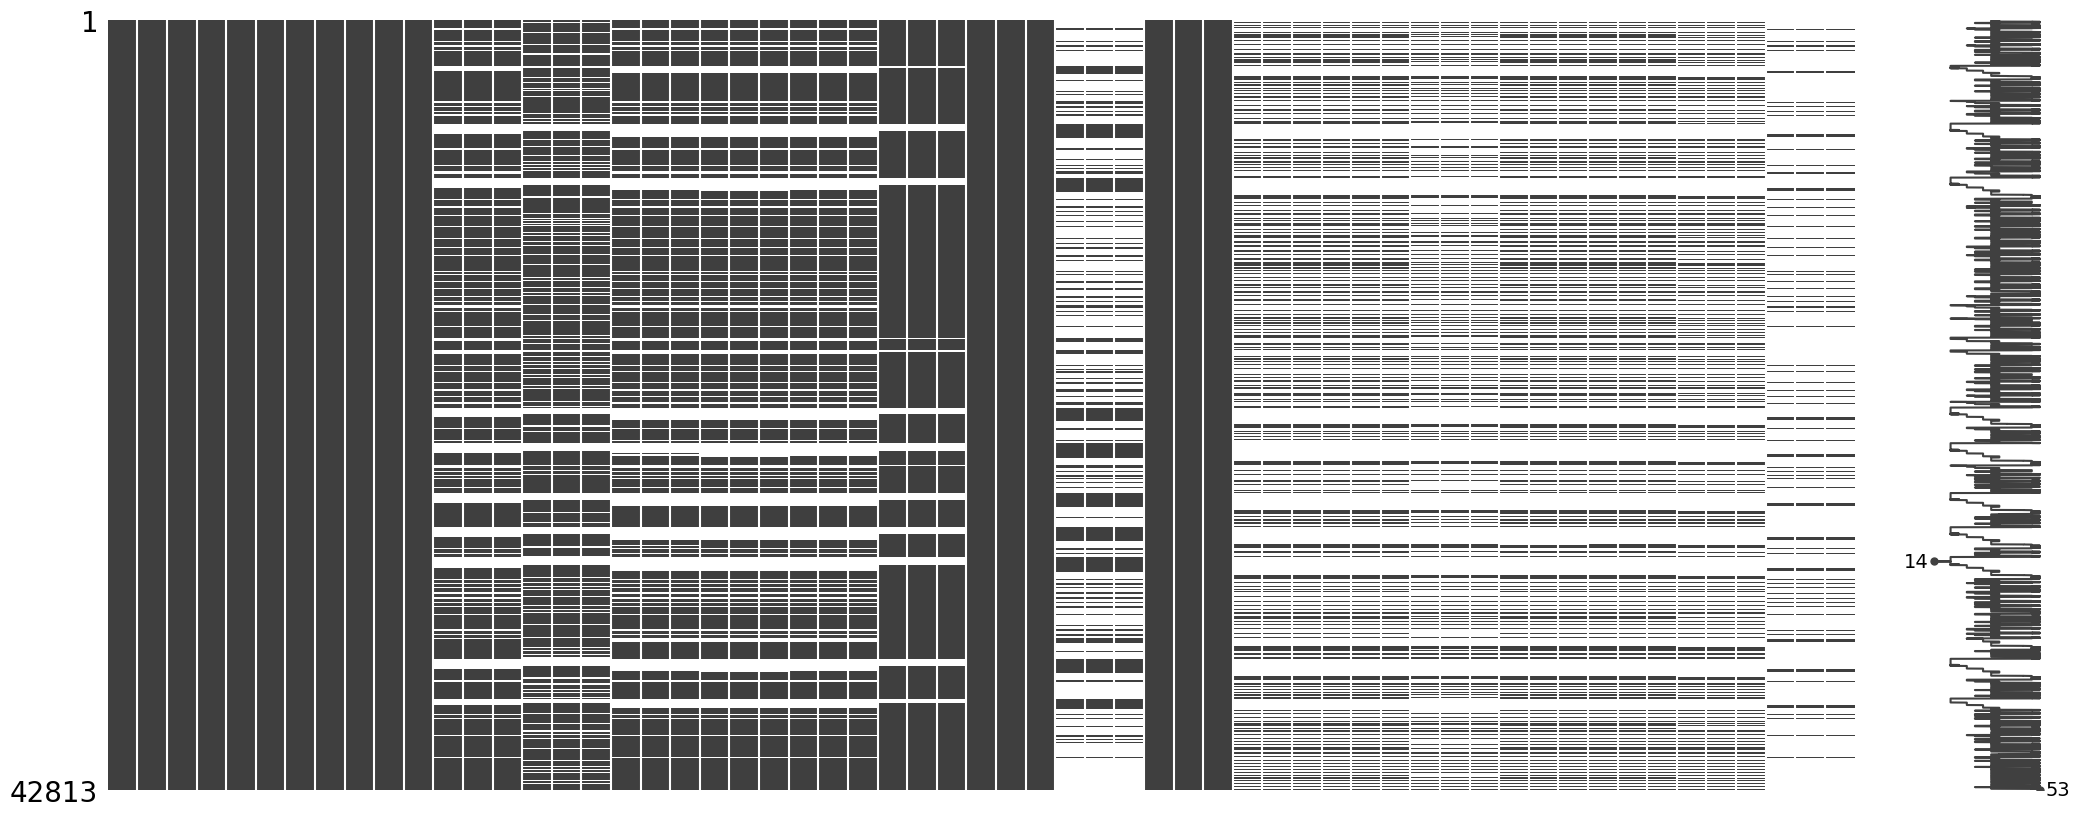

In [9]:
msno.matrix(df)

<Axes: >

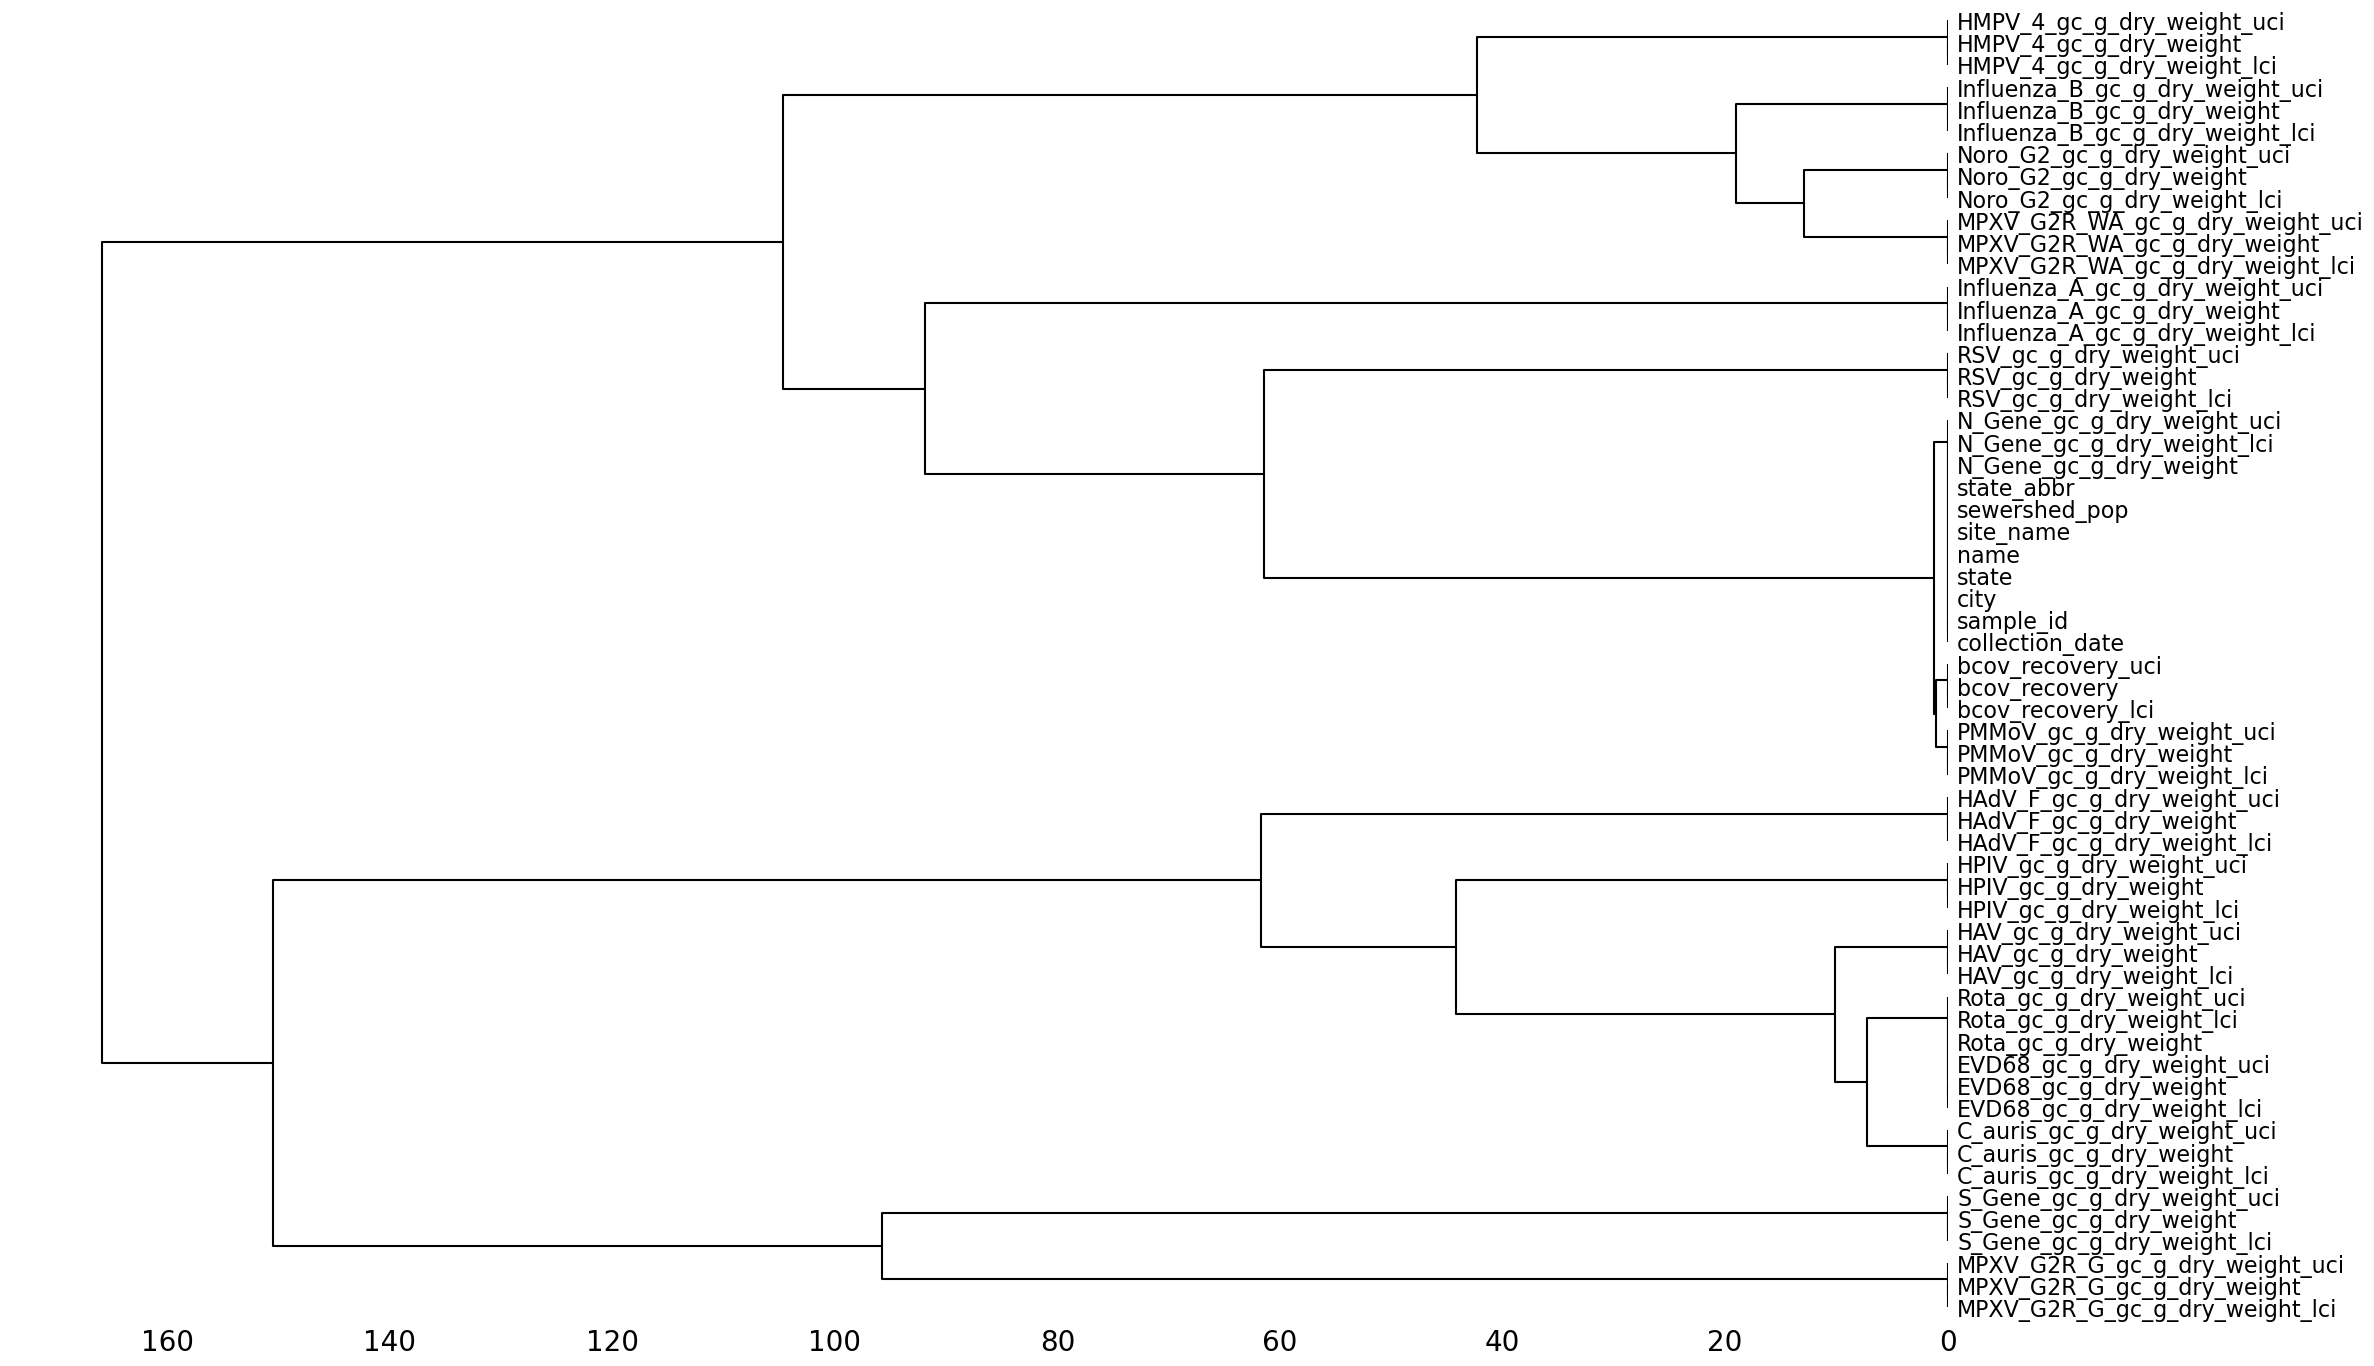

In [10]:
msno.dendrogram(df)

## Cleanup 
#### make sure site names are distinct 
Exploration revealed that there are two sites with the name "Northwest Water Reclamation Facility", one in Orlando FL and one in St Petersburg FL, so each of these sites is going to have its city appended to the site_name. 

In [11]:
condition = (df['site_name'].str.contains('Northwest Water Reclamation Facility')) & (df['city'] == 'Orlando')
# Change all the ones that are Orlando to Orlando
df.loc[condition, 'site_name'] = 'Northwest Water Reclamation Facility Orlando'
# Now change all the rest to Saint Petersburg
df.loc[condition, 'site_name'] = 'Northwest Water Reclamation Facility Saint Petersburg'

In [12]:
df['site_name'].nunique()

194

Also clean up San Francisco, which is listed in city with its state

In [13]:
condition = (df['city'] == 'San Francisco, CA')
# Change city to just San Francisco
df.loc[condition, 'city'] = 'San Francisco'

The site CODIGA is on the Stanford campus

In [14]:
condition = (df['city'] == 'CODIGA')
# Change city to Stanford
df.loc[condition, 'city'] = 'Stanford'

And clean up other sites whose indicated city is unknown to the census bureau

In [15]:
condition = (df['city'] == 'Silicon Valley')
# Change city to Redwood City
df.loc[condition, 'city'] = 'Redwood City'

In [16]:
condition = (df['city'] == 'North Miami') & (df['state_abbr'] == 'FL')
df.loc[condition, 'city'] = 'Miami'

In [17]:
condition = (df['city'] == 'College Park') & (df['state_abbr'] == 'GA')
df.loc[condition, 'city'] = 'Atlanta'

In [18]:
condition = (df['city'] == 'Hollywood') & (df['state_abbr'] == 'MD')
df.loc[condition, 'city'] = 'Leonardtown'

In [19]:
condition = (df['city'] == 'Boston Metropolitan Area') & (df['state_abbr'] == 'MA')
df.loc[condition, 'city'] = 'Boston'

In [20]:
condition = (df['city'] == 'York Beach') & (df['state_abbr'] == 'ME')
df.loc[condition, 'city'] = 'York'

In [21]:
condition = (df['city'] == 'Wichita Falls, TX')
df.loc[condition, 'city'] = 'Wichita Falls'

In [22]:
condition = (df['city'] == 'Mt. Pleasant') & (df['state_abbr'] == 'MI')
df.loc[condition, 'city'] = 'Mount Pleasant'

In [23]:
condition = (df['city'] == 'St. Cloud') & (df['state_abbr'] == 'MN')
df.loc[condition, 'city'] = 'Saint Cloud'

In [24]:
condition = (df['city'] == 'Winston-Salem') & (df['state_abbr'] == 'NC')
df.loc[condition, 'city'] = 'Winston Salem'

In [25]:
condition = (df['city'] == 'Union Beach') & (df['state_abbr'] == 'NJ')
df.loc[condition, 'city'] = 'Keyport'

In [26]:
condition = (df['city'] == 'Woodlands') & (df['state_abbr'] == 'TX')
df.loc[condition, 'city'] = 'Spring'

## Structure the data according to the ERD and write the tables

### Table: site

In [27]:
df_sites = df[['site_name',
              'city', 
              'state_abbr',
              'sewershed_pop', 
            ]].copy().drop_duplicates().reset_index(drop = True)
df_sites['site_id'] = pd.Series(range(df_sites.shape[0]))
df_sites= df_sites[['site_id',
                  'site_name',
                  'city', 
                  'state_abbr',
                  'sewershed_pop', 
            ]]
df_sites.head()

,site_id,site_name,city,state_abbr,sewershed_pop
0,0,Akron Water Reclamation Facility,Akron,OH,365000
1,1,Altamonte Springs Regional Water Reclamation F...,Altamonte Springs,FL,95000
2,2,John M. Asplund Water Pollution Control Facility,Anchorage,AK,220000
3,3,City of Ann Arbor Wastewater Treatment Plant,Ann Arbor,MI,125000
4,4,Aquia Wastewater Treatment Facility,Stafford,VA,100000


In [28]:
print("dataframe df_sites has {} rows and {} columns.".format(df_sites.shape[0],df_sites.shape[1]))

dataframe df_sites has 194 rows and 5 columns.


In [29]:
# Check for null values
df_sites.isnull().sum()

site_id          0
site_name        0
city             0
state_abbr       0
sewershed_pop    0
dtype: int64

In [30]:
# Make site lookup dictionary for later
df_sites_dict = { name: id for (name, id) in zip(df_sites['site_name'], df_sites['site_id']) }
df_sites_dict

{'Akron Water Reclamation Facility': 0,
 'Altamonte Springs Regional Water Reclamation Facility': 1,
 'John M. Asplund Water Pollution Control Facility': 2,
 'City of Ann Arbor Wastewater Treatment Plant': 3,
 'Aquia Wastewater Treatment Facility': 4,
 'City of Bangor Wastewater Treatment Plant': 5,
 'South Monmouth Regional Sewerage Authority': 6,
 'Valley Creek Water Reclamation Facility': 7,
 'Big Creek Water Reclamation Facility': 8,
 'Dillman Road WWTP': 9,
 'Blue Plains Advanced Wastewater Treatment Plant': 10,
 'Deer Island Treatment Plant': 11,
 'Cumberland County Utilities Authority': 12,
 'The Somerset Raritan Valley Sewerage Authority': 13,
 'Brunswick Sewer District': 14,
 'CODIGA': 15,
 'Cahaba River Water Reclamation Facility': 16,
 'City of Carmel WWTP': 17,
 'Central Valley Water Reclamation Facility': 18,
 'Moccasin Bend WWTP': 19,
 'DELCORA Western Regional Treatment Plant': 20,
 'City of Clinton': 21,
 'Coastal Treatment Plant': 22,
 "City of Coeur d'Alene Water Reso

In [31]:
df_sites.to_csv("../static/data/sites.csv", encoding="utf-8", index=False)

### Table: samples

In [32]:
df_samples = df[['sample_id', 'site_name', 'collection_date']].copy()
df_samples['year'] = [int("20"+date[-2:]) for date in df_samples['collection_date']]
df_samples.head()

,sample_id,site_name,collection_date,year
0,166-230106,Akron Water Reclamation Facility,1/6/23,2023
1,166-230109,Akron Water Reclamation Facility,1/9/23,2023
2,166-230111,Akron Water Reclamation Facility,1/11/23,2023
3,166-230113,Akron Water Reclamation Facility,1/13/23,2023
4,166-230118,Akron Water Reclamation Facility,1/18/23,2023


In [33]:
df_samples['site_id'] = df_samples['site_name'].apply(lambda x: df_sites_dict[x])
df_samples = df_samples[['sample_id',
                         'site_id',
                         'collection_date',
                         'year']]
df_samples.head()

,sample_id,site_id,collection_date,year
0,166-230106,0,1/6/23,2023
1,166-230109,0,1/9/23,2023
2,166-230111,0,1/11/23,2023
3,166-230113,0,1/13/23,2023
4,166-230118,0,1/18/23,2023


In [34]:
# Check for null values
df_samples.isnull().sum()

sample_id          0
site_id            0
collection_date    0
year               0
dtype: int64

In [35]:
df_samples.to_csv("../static/data/samples.csv", encoding="utf-8", index=False)

### Tables: covid_N and covid_S

In [36]:
df_covid_N = df[['sample_id', 
                 'N_Gene_gc_g_dry_weight',
                 'N_Gene_gc_g_dry_weight_lci', 
                 'N_Gene_gc_g_dry_weight_uci',
                ]].copy().dropna(axis ='index', 
                                 how = 'any',
                                 ignore_index = True).reindex()
df_covid_N = df_covid_N.rename(columns = {'N_Gene_gc_g_dry_weight': 'dry_weight',
                                          'N_Gene_gc_g_dry_weight_lci': 'dry_weight_lci', 
                                          'N_Gene_gc_g_dry_weight_uci':'dry_weight_uci'})
df_covid_N['table_key'] = ["COV_N" + str(index) for index in pd.Series(df_covid_N.index)]

df_covid_S = df[['sample_id', 
                 'S_Gene_gc_g_dry_weight',
                 'S_Gene_gc_g_dry_weight_lci', 
                 'S_Gene_gc_g_dry_weight_uci',
                ]].copy().dropna(axis ='index', 
                                 how = 'any',
                                ignore_index = True).reindex()
df_covid_S = df_covid_S.rename(columns = {'S_Gene_gc_g_dry_weight': 'dry_weight',
                                          'S_Gene_gc_g_dry_weight_lci': 'dry_weight_lci', 
                                          'S_Gene_gc_g_dry_weight_uci':'dry_weight_uci'})
df_covid_S['table_key'] = ["COV_S" + str(index) for index in pd.Series(df_covid_S.index)]

In [37]:
df_covid_N.head()

,sample_id,dry_weight,dry_weight_lci,dry_weight_uci,table_key
0,166-230106,305933.981236,288701.398448,322095.142691,COV_N0
1,166-230109,190790.361661,171726.786316,204682.777051,COV_N1
2,166-230111,202384.057693,188447.826998,214840.798521,COV_N2
3,166-230113,261004.940224,249742.896142,272269.302419,COV_N3
4,166-230118,423737.180042,406638.347405,440839.659472,COV_N4


In [38]:
df_covid_S.head()

,sample_id,dry_weight,dry_weight_lci,dry_weight_uci,table_key
0,166-230106,256798.599709,241521.569455,270107.708558,COV_S0
1,166-230109,191460.702050,169996.483230,204427.185067,COV_S1
2,166-230111,183199.713090,171350.298161,195050.687377,COV_S2
3,166-230113,224964.828271,209426.114690,236799.729605,COV_S3
4,166-230118,363557.731556,347722.467354,382484.260092,COV_S4


In [39]:
print("dataframe df_covid_N has {} null values.".format(df_covid_N.isnull().sum().sum()))
print("dataframe df_covid_S has {} null values.".format(df_covid_S.isnull().sum().sum()))

dataframe df_covid_N has 0 null values.
dataframe df_covid_S has 0 null values.


In [40]:
df_covid_N.to_csv("../static/data/covid_N.csv", encoding="utf-8", index=False)
df_covid_S.to_csv("../static/data/covid_S.csv", encoding="utf-8", index=False)

### Tables: influenza_A and influenza_B

In [41]:
df_influenza_A = df[['sample_id', 
                     'Influenza_A_gc_g_dry_weight', 
                     'Influenza_A_gc_g_dry_weight_lci',
                     'Influenza_A_gc_g_dry_weight_uci',
                ]].copy().dropna(axis ='index', 
                                 how = 'any',
                                ignore_index = True).reindex()


df_influenza_B = df[['sample_id', 
                     'Influenza_B_gc_g_dry_weight',
                     'Influenza_B_gc_g_dry_weight_lci', 
                     'Influenza_B_gc_g_dry_weight_uci',
                ]].copy().dropna(axis ='index', 
                                 how = 'any',
                                ignore_index = True).reindex()

df_influenza_A = df_influenza_A.rename(columns = {'Influenza_A_gc_g_dry_weight': 'dry_weight',
                                              'Influenza_A_gc_g_dry_weight_lci': 'dry_weight_lci', 
                                              'Influenza_A_gc_g_dry_weight_uci':'dry_weight_uci'})
df_influenza_A['table_key'] = ["INF_A" + str(index) for index in pd.Series(df_influenza_A.index)]

df_influenza_B = df_influenza_B.rename(columns = {'Influenza_B_gc_g_dry_weight': 'dry_weight',
                                              'Influenza_B_gc_g_dry_weight_lci': 'dry_weight_lci', 
                                              'Influenza_B_gc_g_dry_weight_uci':'dry_weight_uci'})
df_influenza_B['table_key'] = ["INF_B" + str(index) for index in pd.Series(df_influenza_B.index)]

print("dataframe df_influenza_A has {} rows and {} columns.".format(df_influenza_A.shape[0],df_influenza_A.shape[1]))
print("dataframe df_influenza_B has {} rows and {} columns.".format(df_influenza_B.shape[0],df_influenza_B.shape[1]))

dataframe df_influenza_A has 33730 rows and 5 columns.
dataframe df_influenza_B has 31034 rows and 5 columns.


In [42]:
df_influenza_A.head()

,sample_id,dry_weight,dry_weight_lci,dry_weight_uci,table_key
0,166-230106,24922.388252,19877.332630,29337.935016,INF_A0
1,166-230109,18721.845717,15410.399665,22477.504183,INF_A1
2,166-230111,10721.268158,7435.222032,13855.409736,INF_A2
3,166-230113,11153.870981,8544.051894,13984.829277,INF_A3
4,166-230118,5506.403041,3774.597960,7701.499908,INF_A4


In [43]:
df_influenza_B.head()

,sample_id,dry_weight,dry_weight_lci,dry_weight_uci,table_key
0,166-230106,0.0,0.0,0.0,INF_B0
1,166-230109,0.0,0.0,0.0,INF_B1
2,166-230111,0.0,0.0,0.0,INF_B2
3,166-230113,0.0,0.0,0.0,INF_B3
4,166-230118,0.0,0.0,0.0,INF_B4


In [44]:
df_influenza_A.to_csv("../static/data/influenza_A.csv", encoding="utf-8", index=False)
df_influenza_B.to_csv("../static/data/influenza_B.csv", encoding="utf-8", index=False)

### Table: PMMoV

In [45]:
df_PMMoV = df[['sample_id', 
               'PMMoV_gc_g_dry_weight',
               'PMMoV_gc_g_dry_weight_lci',
               'PMMoV_gc_g_dry_weight_uci',
                ]].copy().dropna(axis ='index', 
                                 how = 'any',
                                ignore_index = True).reindex()

df_PMMoV = df_PMMoV.rename(columns = {'PMMoV_gc_g_dry_weight': 'dry_weight',
                                      'PMMoV_gc_g_dry_weight_lci': 'dry_weight_lci', 
                                              'PMMoV_gc_g_dry_weight_uci':'dry_weight_uci'})
df_PMMoV['table_key'] = ["PMMoV" + str(index) for index in pd.Series(df_PMMoV.index)]

print("dataframe df_PMMoV has {} rows and {} columns.".format(df_PMMoV.shape[0],df_PMMoV.shape[1]))

dataframe df_PMMoV has 42812 rows and 5 columns.


In [46]:
df_PMMoV.head()

,sample_id,dry_weight,dry_weight_lci,dry_weight_uci,table_key
0,166-230106,1.657662e+08,1.609010e+08,1.706355e+08,PMMoV0
1,166-230109,2.482285e+08,2.415637e+08,2.548996e+08,PMMoV1
2,166-230111,3.092826e+08,3.006213e+08,3.179522e+08,PMMoV2
3,166-230113,2.661849e+08,2.588556e+08,2.740735e+08,PMMoV3
4,166-230118,1.884447e+08,1.822308e+08,1.946635e+08,PMMoV4


In [47]:
df_samples.head()

,sample_id,site_id,collection_date,year
0,166-230106,0,1/6/23,2023
1,166-230109,0,1/9/23,2023
2,166-230111,0,1/11/23,2023
3,166-230113,0,1/13/23,2023
4,166-230118,0,1/18/23,2023


In [48]:
df_PMMoV.to_csv("../static/data/PMMoV.csv", encoding="utf-8", index=False)

### Table: city_to_county
#### Create a table that has city, state, and county in it, together with the census fips codes

Read in a table of state and county fips codes downloaded from the census. 

In [49]:
df_fips = pd.read_csv("fips_codes.csv", dtype = str)
print("df_fips has {} rows and {} columns.".format(df_fips.shape[0], df_fips.shape[1]))

df_fips has 9664 rows and 5 columns.


In [50]:
df_fips.head()

,state_name,state_abbr,county_name,state_fips,county_fips
0,Alabama,AL,Autauga County,01,001
1,Alabama,AL,Baldwin County,01,003
2,Alabama,AL,Barbour County,01,005
3,Alabama,AL,Bibb County,01,007
4,Alabama,AL,Blount County,01,009


Make state fips code dictionary and (state,count) fips code dictionary

In [51]:
states = df_fips[['state_abbr','state_fips']].drop_duplicates()
state_fips_dict = {state: fips for (state, fips) in zip(states['state_abbr'], states['state_fips'])}
state_fips_dict

df_counties = df_fips[['state_abbr','county_name','county_fips']].drop_duplicates().reset_index(drop = True)
county_fips_dict = {(df_counties.iloc[i]['state_abbr'],
                     df_counties.iloc[i]['county_name'])
                     : df_counties.iloc[i]['county_fips'] 
                     for i in range(len(df_counties))}

county_fips_dict

{('AL', 'Autauga County'): '001',
 ('AL', 'Baldwin County'): '003',
 ('AL', 'Barbour County'): '005',
 ('AL', 'Bibb County'): '007',
 ('AL', 'Blount County'): '009',
 ('AL', 'Bullock County'): '011',
 ('AL', 'Butler County'): '013',
 ('AL', 'Calhoun County'): '015',
 ('AL', 'Cherokee County'): '019',
 ('AL', 'Chilton County'): '021',
 ('AL', 'Choctaw County'): '023',
 ('AL', 'Clarke County'): '025',
 ('AL', 'Clay County'): '027',
 ('AL', 'Cleburne County'): '029',
 ('AL', 'Coffee County'): '031',
 ('AL', 'Colbert County'): '033',
 ('AL', 'Conecuh County'): '035',
 ('AL', 'Coosa County'): '037',
 ('AL', 'Crenshaw County'): '041',
 ('AL', 'Cullman County'): '043',
 ('AL', 'Dallas County'): '047',
 ('AL', 'DeKalb County'): '049',
 ('AL', 'Escambia County'): '053',
 ('AL', 'Etowah County'): '055',
 ('AL', 'Franklin County'): '059',
 ('AL', 'Greene County'): '063',
 ('AL', 'Hale County'): '065',
 ('AL', 'Houston County'): '069',
 ('AL', 'Jackson County'): '071',
 ('AL', 'Lamar County'): '07

Prepare a table with the cities and states that we have in the list of sites

In [52]:
df_prep = df[['city', 
              'state_abbr', 
            ]].copy().drop_duplicates().sort_values('state_abbr').reset_index(drop = True)


In [53]:
df_prep.isnull().sum()

city          0
state_abbr    0
dtype: int64

In [54]:
print("dataframe df_prep has {} rows and {} columns.".format(df_prep.shape[0],df_prep.shape[1]))

dataframe df_prep has 155 rows and 2 columns.


In [55]:
df_prep.head()

,city,state_abbr
0,Anchorage,AK
1,Juneau,AK
2,Birmingham,AL
3,Fultondale,AL
4,Pinson,AL


Now we have to take the cities in df_prep and look up the best associated county. 

In [56]:
# Take in a city and state abbreviation and returns (city, state, county) for the county
# that has the most common "STANDARD" zip code for (city, state).
# STANDARD excludes POBoxes, diplomatic, single-zip businesses, etc. 
def get_county (row):
    city = row['city']
    state = row['state_abbr']
    filtered_zips = zc.filter_by(city=city, state=state)
    filtered_zips_standard = [entry for entry in filtered_zips if entry['zip_code_type']=="STANDARD"]
    try:
        result = Most_Common([(city, entry['state'], entry['county']) for entry in filtered_zips_standard])
    except:
        result = (city, state, None)
    return result

In [57]:
df_city_to_county = df_prep.copy()

In [58]:
df_city_to_county.head()

,city,state_abbr
0,Anchorage,AK
1,Juneau,AK
2,Birmingham,AL
3,Fultondale,AL
4,Pinson,AL


In [59]:
df_city_to_county['county'] = df_city_to_county.apply(lambda x: get_county(x)[2], axis = 1)

In [60]:
df_city_to_county['state_fips'] = df_city_to_county['state_abbr'].apply(lambda x: state_fips_dict[x])

In [61]:
df_city_to_county.head()

,city,state_abbr,county,state_fips
0,Anchorage,AK,Anchorage Municipality,02
1,Juneau,AK,Juneau City and Borough,02
2,Birmingham,AL,Jefferson County,01
3,Fultondale,AL,Jefferson County,01
4,Pinson,AL,Jefferson County,01


In [62]:
df_city_to_county['county_fips'] = df_city_to_county.apply(lambda x: county_fips_dict[(x['state_abbr'],x['county'])], axis = 1)

In [63]:
df_city_to_county.head()

,city,state_abbr,county,state_fips,county_fips
0,Anchorage,AK,Anchorage Municipality,02,020
1,Juneau,AK,Juneau City and Borough,02,110
2,Birmingham,AL,Jefferson County,01,073
3,Fultondale,AL,Jefferson County,01,073
4,Pinson,AL,Jefferson County,01,073


In [64]:
df_city_to_county.isnull().any()

city           False
state_abbr     False
county         False
state_fips     False
county_fips    False
dtype: bool

In [65]:
df_city_to_county.to_csv("../static/data/city_to_county.csv", encoding="utf-8", index=False)